In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
import matplotlib.animation as ani

from hola.tune import Tuner

In [2]:
x = np.linspace(0,1,100)

In [3]:
def f(x):
    return np.sin(2*np.pi*x) + np.sin(2*np.pi*10*x)

/Users/gmaher/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


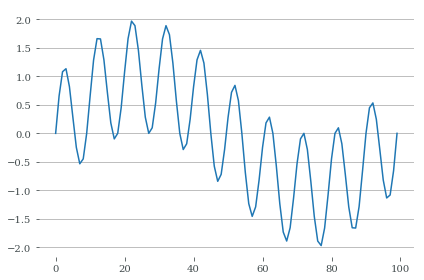

In [4]:
y = f(x)

plt.figure()
plt.plot(y)
plt.show()

In [5]:
def run(x):
    return {"f":f(x)}

In [6]:
params_config = {
    "x":{
        "min":0,
        "max":1,
        }
 }

objectives_config = {
    "f":{
        "target":-3,
        "limit":10
    }
}

In [7]:
tuner = Tuner(params_config, objectives_config)

In [8]:
def plot_func(i):
    p = tuner.experiment.sample()

    r = run(**p)

    tuner.experiment.add_run(r,p)
    tuner.experiment.sort_samples()

    data = tuner.get_leaderboard()
    n = data.shape[0]
    ne = int(n*0.2)

    xs = data['x'].values
    ys = data['f'].values

    xe = xs[:ne]
    ye = ys[:ne]

    xb = xs[ne:]
    yb = ys[ne:]

    plt.plot(x,y)
    plt.plot(xb,yb, linestyle='', marker='o', color='g')
    plt.plot(xe,ye, linestyle='', marker='o', color='r')
    plt.grid(True)

In [9]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib notebook

animator = ani.FuncAnimation(fig, plot_func, interval = 100)
plt.show()